# load data

In [28]:
import pandas as pd

data = pd.read_csv("./data/motion_sense_data_sm.csv")
data

,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,code,weight,height,age,gender,activity
0,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,1.0,102.0,188.0,46.0,1.0,downstairs
1,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,1.0,102.0,188.0,46.0,1.0,downstairs
2,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,1.0,102.0,188.0,46.0,1.0,downstairs
3,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,1.0,102.0,188.0,46.0,1.0,downstairs
4,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,1.0,102.0,188.0,46.0,1.0,downstairs
...,...,...,...,...,...,...,...,...,...,...,...,...
2065723,-0.120025,3.900765,0.105771,0.389296,-0.060636,-0.017247,17.0,76.0,180.0,26.0,1.0,upstairs
2065724,1.149925,0.967907,1.011933,-0.147735,0.003548,0.186704,11.0,70.0,178.0,24.0,1.0,upstairs
2065725,1.311938,0.497284,0.929720,-0.190504,0.389003,0.014665,23.0,68.0,170.0,25.0,0.0,upstairs
2065726,1.190189,6.012605,1.744576,0.469483,-0.299237,-0.572555,14.0,70.0,180.0,35.0,1.0,upstairs


In [29]:
data_complete = data.copy()
data_complete = data_complete.drop(columns=["weight", "height", "age", "gender"])

data_without_downstairs = data_complete.copy()
data_without_downstairs = data_without_downstairs[data_without_downstairs["activity"] != "downstairs"]

In [30]:
data_without_downstairs["activity"].value_counts()

activity
jogging     344288
sitting     344288
standing    344288
upstairs    344288
walking     344288
Name: count, dtype: int64

In [31]:
### split data into train and test

from sklearn.model_selection import train_test_split

X = data_without_downstairs.drop(columns=["activity"])
y = data_without_downstairs["activity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
test.__len__() * 0.20


68857.6

In [32]:
### remove 68857 rows from test data

test = test.sample(frac=1).reset_index(drop=True)
test = test.drop(test.index[:68857])
test

,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,code,activity
68857,0.453629,0.338479,0.457479,0.001644,-0.120313,0.221452,8.0,walking
68858,-2.222058,0.089601,-0.440408,0.027810,0.111479,0.200853,5.0,walking
68859,1.036145,-2.683833,0.904807,0.259438,0.352358,-0.047865,2.0,walking
68860,0.001131,-0.066668,-0.012792,-0.019020,0.001364,0.022998,7.0,standing
68861,0.009458,0.001271,-0.006381,-0.004943,-0.001395,-0.007746,5.0,sitting
...,...,...,...,...,...,...,...,...
344283,-3.642182,-0.837202,-0.276527,-0.425265,0.764680,0.403932,15.0,upstairs
344284,-1.352964,-0.014215,-0.663313,-0.340324,-0.206080,-0.098104,3.0,jogging
344285,-0.220808,-3.826942,0.292600,0.574669,-0.523390,-1.198666,15.0,jogging
344286,-0.000928,0.007980,-0.000146,0.001266,0.004398,-0.001409,20.0,sitting


In [33]:
### get random 68857 rows from data_complete

data_complete = data_complete.sample(n=68857)
data_complete

,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,code,activity
1659951,1.833935,-0.993949,0.533494,0.601976,-0.338525,0.298615,6.0,jogging
844647,-0.030835,0.016982,0.010841,-0.000956,0.003032,0.001854,6.0,standing
1895573,-1.698432,-1.384975,-0.532591,0.129634,0.068401,-0.201479,9.0,upstairs
1739613,-0.804037,2.263752,-1.990383,0.742120,0.692235,-0.598077,22.0,jogging
663327,-0.040610,-0.003561,-0.105992,0.014424,-0.006814,-0.013588,7.0,standing
...,...,...,...,...,...,...,...,...
1271749,-0.287976,-3.381673,1.509568,-0.108319,-0.240060,0.145595,10.0,walking
1936772,1.149420,-2.484819,0.746011,-0.666386,-0.213531,0.338806,10.0,upstairs
1277275,-2.276259,0.445954,-1.300667,0.970922,0.280110,0.317615,10.0,walking
1517463,-0.266732,0.170506,-0.073097,0.276190,0.077417,-0.508968,4.0,downstairs


In [34]:
test = pd.concat([test, data_complete], axis=0)
test

,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,code,activity
68857,0.453629,0.338479,0.457479,0.001644,-0.120313,0.221452,8.0,walking
68858,-2.222058,0.089601,-0.440408,0.027810,0.111479,0.200853,5.0,walking
68859,1.036145,-2.683833,0.904807,0.259438,0.352358,-0.047865,2.0,walking
68860,0.001131,-0.066668,-0.012792,-0.019020,0.001364,0.022998,7.0,standing
68861,0.009458,0.001271,-0.006381,-0.004943,-0.001395,-0.007746,5.0,sitting
...,...,...,...,...,...,...,...,...
1271749,-0.287976,-3.381673,1.509568,-0.108319,-0.240060,0.145595,10.0,walking
1936772,1.149420,-2.484819,0.746011,-0.666386,-0.213531,0.338806,10.0,upstairs
1277275,-2.276259,0.445954,-1.300667,0.970922,0.280110,0.317615,10.0,walking
1517463,-0.266732,0.170506,-0.073097,0.276190,0.077417,-0.508968,4.0,downstairs


In [35]:
### order by activity and code

train = train.sort_values(by=["activity", "code"])
test = test.sort_values(by=["activity", "code"])

In [36]:
### label enconde activities

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train["activity"])

train["activity"] = le.transform(train["activity"])
test_no_downstairs = test[test["activity"] != "downstairs"]
test_no_downstairs["activity"] = le.transform(test_no_downstairs["activity"])

le.classes_

/var/folders/xh/n_j2f34x3gbbkjmhhfy63yc00000gn/T/ipykernel_80392/2123831400.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_no_downstairs["activity"] = le.transform(test_no_downstairs["activity"])


array(['jogging', 'sitting', 'standing', 'upstairs', 'walking'],
      dtype=object)

In [37]:
test_downstairs = test[test["activity"] == "downstairs"]
test_downstairs["activity"] = 5

test = pd.concat([test_downstairs, test_no_downstairs], axis=0)

/var/folders/xh/n_j2f34x3gbbkjmhhfy63yc00000gn/T/ipykernel_80392/3080696226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_downstairs["activity"] = 5


In [38]:
test["activity"].value_counts()

activity
4    66805
2    66643
3    66558
1    66334
0    66330
5    11618
Name: count, dtype: int64

In [39]:
train["activity"].value_counts()

activity
1    275678
0    275501
2    275494
3    275288
4    275191
Name: count, dtype: int64

In [40]:
train.to_csv("./data/motion_sense_train_trial_2.csv", index=False)
test.to_csv("./data/motion_sense_test_trial_2.csv", index=False)

# standard data

In [41]:
### normalize sensor data

from sklearn.preprocessing import StandardScaler

sensor_columns = ["userAcceleration.x", "userAcceleration.y", "userAcceleration.z", "rotationRate.x", "rotationRate.y", "rotationRate.z"]

scaler = StandardScaler()
train[sensor_columns] = scaler.fit_transform(train[sensor_columns])
test[sensor_columns] = scaler.transform(test[sensor_columns])

train.to_csv("./data/motion_sense_train_trial_2.csv", index=False)
test.to_csv("./data/motion_sense_test_trial_2.csv", index=False)

In [2]:
import numpy as np
import pandas as pd

sensor_data = pd.read_csv("./data/motion_sense_test_trial_2.csv", usecols=["rotationRate.x", "rotationRate.y", "rotationRate.z", "userAcceleration.x", "userAcceleration.y", "userAcceleration.z", "activity"])

buffer_size = 256
frequency_hz = 50

def apply_fft_on_window(window_data):
    fft_gx = np.fft.fft(window_data["rotationRate.x"])
    fft_gy = np.fft.fft(window_data["rotationRate.y"])
    fft_gz = np.fft.fft(window_data["rotationRate.z"])
    fft_ax = np.fft.fft(window_data["userAcceleration.x"])
    fft_ay = np.fft.fft(window_data["userAcceleration.y"])
    fft_az = np.fft.fft(window_data["userAcceleration.z"])

    freq = np.fft.fftfreq(len(window_data), 1/frequency_hz)

    class_label = pd.DataFrame(window_data["activity"]).mode().iloc[0, 0]

    return freq, np.abs(fft_gx), np.abs(fft_gy), np.abs(fft_gz), np.abs(fft_ax), np.abs(fft_ay), np.abs(fft_az), class_label

num_windows = (len(sensor_data) - buffer_size) + 1

In [3]:
fft_data = []

for i in range(0, num_windows, buffer_size):
    window_data = sensor_data[i:i+buffer_size]
    freq, fft_gx, fft_gy, fft_gz, fft_ax, fft_ay, fft_az, class_label = apply_fft_on_window(window_data)

    fft_features = {
        "window": i // buffer_size + 1,
        "freq": freq,
        "fft_gyro_x": fft_gx,
        "fft_gyro_y": fft_gy,
        "fft_gyro_z": fft_gz,
        "fft_acc_x": fft_ax,
        "fft_acc_y": fft_ay,
        "fft_acc_z": fft_az,
        "class": class_label
    }

    fft_data.append(fft_features)

df_fft = pd.DataFrame(fft_data)
df_fft.to_csv("processed_test_data_trial_2.csv", index=False)
print("done")

done


In [6]:
from src.data_preprocessing import matrix_fourier_adjust
import pandas as pd

df_fft = pd.read_csv("processed_test_data_trial_2.csv")

X_acc_x, X_acc_y, X_acc_z, X_gyro_x, X_gyro_y, X_gyro_z, class_labels = matrix_fourier_adjust(df_fft, testing=False)

class_labels_series = pd.Series(class_labels.flatten())
class_labels_series.value_counts()

1.0    260
2.0    260
3.0    260
4.0    260
0.0    259
5.0     45
Name: count, dtype: int64

# Test model

In [12]:
from src.data_preprocessing import matrix_fourier_adjust
import pandas as pd

df_fft = pd.read_csv("processed_test_data_trial_2.csv")
data_no_downstairs = df_fft[df_fft["class"] != 5]

X_acc_x, X_acc_y, X_acc_z, X_gyro_x, X_gyro_y, X_gyro_z, class_labels = matrix_fourier_adjust(data_no_downstairs, testing=False)

In [13]:
### load trained model
from tensorflow.keras.models import load_model

model_path = "./src/models/HAR_trial_2.h5"
model = load_model(model_path)

In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np

predictions = model.predict([X_acc_x, X_acc_y, X_acc_z, X_gyro_x, X_gyro_y, X_gyro_z])

# evaluate model with confusion matrix
y_pred = [int(x) for x in predictions.argmax(axis=1)]
y_true = [int(x) for x in class_labels]

cm = confusion_matrix(y_true, y_pred)
print(cm)

# cm to percentage matrix with 4 decimal places
cm = np.round(cm / cm.sum(axis=1)[:, np.newaxis], 3)
print(cm)

 9/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  

/Users/paulaperazzo/Documents/masters/ic2/ExAI - Final Project/.venv/lib/python3.9/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer', 'input_layer_1', 'input_layer_2', 'input_layer_3', 'input_layer_4', 'input_layer_5']. Received: the structure of inputs=('*', '*', '*', '*', '*', '*')
  warnings.warn(


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[250   0   0   2   7]
 [  1 251   8   0   0]
 [  0  11 249   0   0]
 [  0   0   0 259   1]
 [ 36   0   0   8 216]]
[[0.965 0.    0.    0.008 0.027]
 [0.004 0.965 0.031 0.    0.   ]
 [0.    0.042 0.958 0.    0.   ]
 [0.    0.    0.    0.996 0.004]
 [0.138 0.    0.    0.031 0.831]]


/var/folders/xh/n_j2f34x3gbbkjmhhfy63yc00000gn/T/ipykernel_83885/294570611.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_true = [int(x) for x in class_labels]


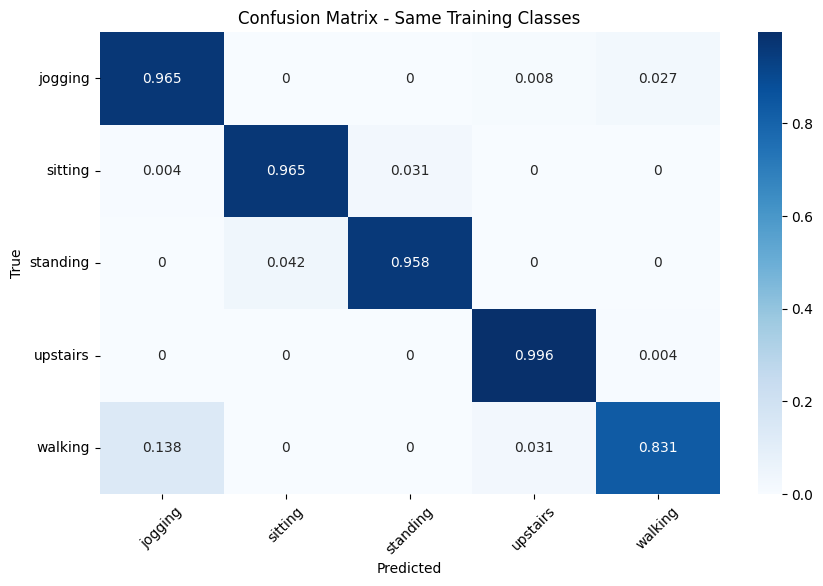

In [17]:
# plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

classes_names = ['jogging', 'sitting', 'standing', 'upstairs', 'walking']

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xticks(ticks=np.arange(5) + 0.5, labels=classes_names, rotation=45)
plt.yticks(ticks=np.arange(5) + 0.5, labels=classes_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Same Training Classes")
plt.show()

In [18]:
### classification report

from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=classes_names))

              precision    recall  f1-score   support

     jogging       0.87      0.97      0.92       259
     sitting       0.96      0.97      0.96       260
    standing       0.97      0.96      0.96       260
    upstairs       0.96      1.00      0.98       260
     walking       0.96      0.83      0.89       260

    accuracy                           0.94      1299
   macro avg       0.95      0.94      0.94      1299
weighted avg       0.95      0.94      0.94      1299



41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


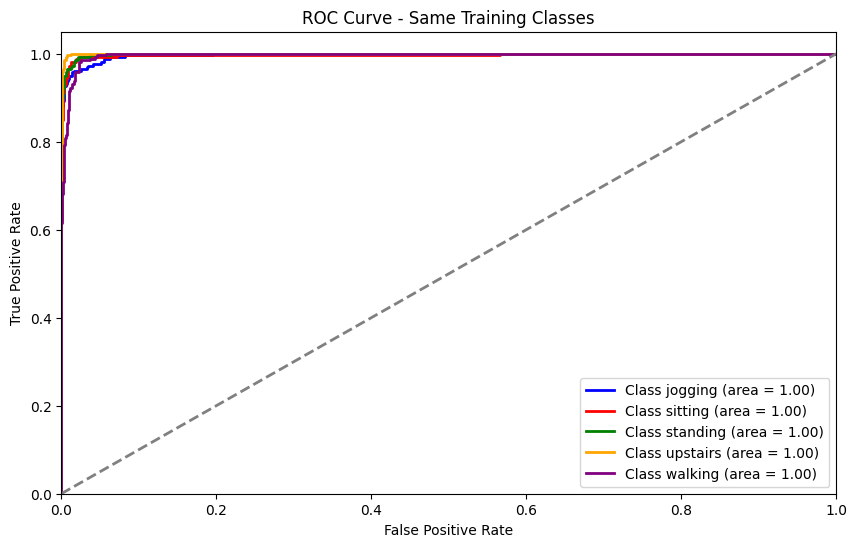

In [21]:
### plot roc curve

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

n_classes = 5
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])
y_pred_proba = model.predict([X_acc_x, X_acc_y, X_acc_z, X_gyro_x, X_gyro_y, X_gyro_z])

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Class {classes_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Same Training Classes')
plt.legend(loc="lower right")
plt.show()

## adding new class (walking downstairs)

In [93]:
from src.data_preprocessing import matrix_fourier_adjust
import pandas as pd

df_fft = pd.read_csv("processed_test_data_trial_2.csv")

X_acc_x, X_acc_y, X_acc_z, X_gyro_x, X_gyro_y, X_gyro_z, class_labels = matrix_fourier_adjust(df_fft, testing=False)

In [94]:
from sklearn.metrics import confusion_matrix
import numpy as np

predictions = model.predict([X_acc_x, X_acc_y, X_acc_z, X_gyro_x, X_gyro_y, X_gyro_z])

# evaluate model with confusion matrix
y_pred = [int(x) for x in predictions.argmax(axis=1)]
y_true = [int(x) for x in class_labels]

cm = confusion_matrix(y_true, y_pred)
print(cm)

# cm to percentage matrix with 4 decimal places
cm = np.round(cm / cm.sum(axis=1)[:, np.newaxis], 3)
print(cm)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[250   0   0   2   7   0]
 [  1 251   8   0   0   0]
 [  0  11 249   0   0   0]
 [  0   0   0 259   1   0]
 [ 36   0   0   8 216   0]
 [  3   0   0  41   1   0]]
[[0.965 0.    0.    0.008 0.027 0.   ]
 [0.004 0.965 0.031 0.    0.    0.   ]
 [0.    0.042 0.958 0.    0.    0.   ]
 [0.    0.    0.    0.996 0.004 0.   ]
 [0.138 0.    0.    0.031 0.831 0.   ]
 [0.067 0.    0.    0.911 0.022 0.   ]]


/var/folders/xh/n_j2f34x3gbbkjmhhfy63yc00000gn/T/ipykernel_83885/294570611.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_true = [int(x) for x in class_labels]


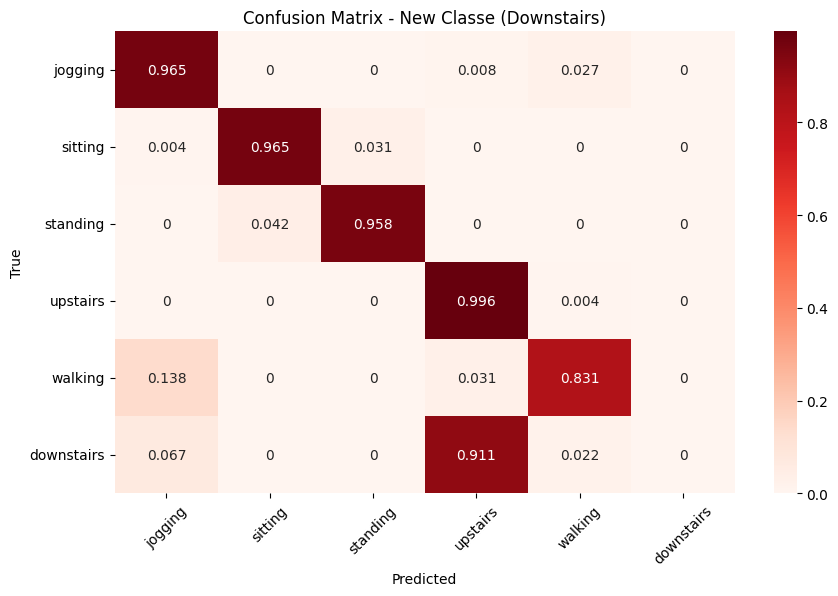

In [95]:
# plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

classes_names = ['jogging', 'sitting', 'standing', 'upstairs', 'walking', 'downstairs']

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xticks(ticks=np.arange(6) + 0.5, labels=classes_names, rotation=45)
plt.yticks(ticks=np.arange(6) + 0.5, labels=classes_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - New Classe (Downstairs)")
plt.show()

In [103]:
### adding the prediction of the new class to the label

from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=classes_names))

              precision    recall  f1-score   support

     jogging       0.86      0.97      0.91       259
     sitting       0.96      0.97      0.96       260
    standing       0.97      0.96      0.96       260
    upstairs       0.84      1.00      0.91       260
     walking       0.96      0.83      0.89       260
  downstairs       0.00      0.00      0.00        45

    accuracy                           0.91      1344
   macro avg       0.76      0.79      0.77      1344
weighted avg       0.89      0.91      0.90      1344



/Users/paulaperazzo/Documents/masters/ic2/ExAI - Final Project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/paulaperazzo/Documents/masters/ic2/ExAI - Final Project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/paulaperazzo/Documents/masters/ic2/ExAI - Final Project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Shape of y_pred_proba: (1344, 5)
Shape of y_true_bin: (1344, 5)


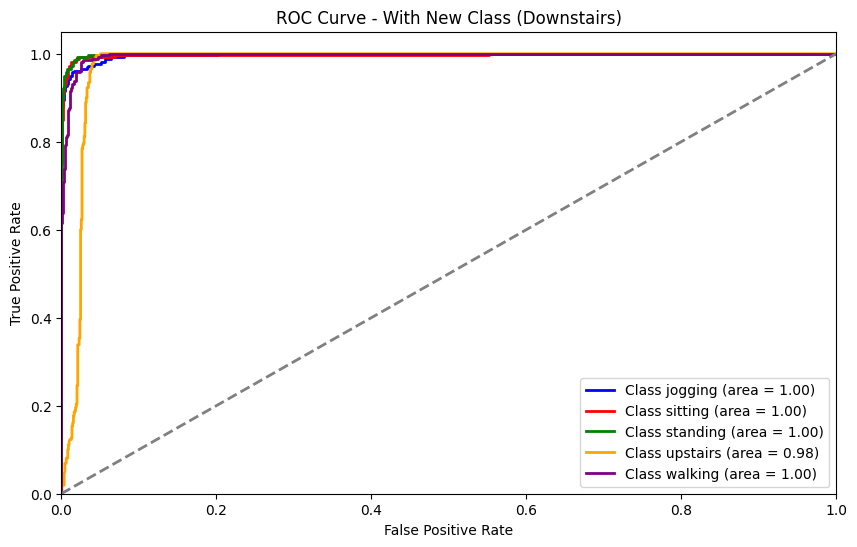

In [106]:
### plot roc curve

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

classes_names = ['jogging', 'sitting', 'standing', 'upstairs', 'walking']

n_classes = 5
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])
y_pred_proba = model.predict([X_acc_x, X_acc_y, X_acc_z, X_gyro_x, X_gyro_y, X_gyro_z])

print("Shape of y_pred_proba:", y_pred_proba.shape)
print("Shape of y_true_bin:", y_true_bin.shape)

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Class {classes_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - With New Class (Downstairs)')
plt.legend(loc="lower right")
plt.show()

In [107]:
import numpy as np
from scipy.stats import entropy
from sklearn.metrics import accuracy_score, confusion_matrix

def calculate_entropy(predictions):
    """Calculate entropy for a given set of predictions (softmax probabilities)."""
    return entropy(predictions, axis=1)

def predict_with_rejector(model, X_test, threshold):
    """Make predictions with a rejection mechanism based on entropy."""
    softmax_outputs = model.predict(X_test)
    entropies = calculate_entropy(softmax_outputs)

    predictions = np.argmax(softmax_outputs, axis=1)
    rejected = entropies > threshold
    accepted = ~rejected

    return predictions, accepted, rejected, entropies

# entropy_threshold = 1.5
entropy_thresholds = [1.5, 1.4, 1.3, 1.2, 1.1, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.3, 0.1]
X_test = [X_acc_x, X_acc_y, X_acc_z, X_gyro_x, X_gyro_y, X_gyro_z]

for i in range(len(entropy_thresholds)):
    entropy_threshold = entropy_thresholds[i]
    predictions, accepted, rejected, entropies = predict_with_rejector(model, X_test, entropy_threshold)

    y_true = np.array(class_labels)

    # Only evaluate accuracy on accepted instances
    accuracy_with_rejection = accuracy_score(y_true[accepted], predictions[accepted])

    reject_rate = np.mean(rejected)  # Proportion of rejected samples

    print(f"Entropy threshold: {entropy_threshold}")
    print(f"Accuracy with rejection: {accuracy_with_rejection}")
    print(f"Rejection rate: {reject_rate * 100:.2f}%")

    if entropy_threshold < 0:
        break

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Entropy threshold: 1.5
Accuracy with rejection: 0.9114583333333334
Rejection rate: 0.00%
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Entropy threshold: 1.4
Accuracy with rejection: 0.9114583333333334
Rejection rate: 0.00%
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Entropy threshold: 1.3
Accuracy with rejection: 0.9114583333333334
Rejection rate: 0.00%
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Entropy threshold: 1.2
Accuracy with rejection: 0.9114583333333334
Rejection rate: 0.00%
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Entropy threshold: 1.1
Accuracy with rejection: 0.9114583333333334
Rejection rate: 0.00%
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Entropy threshold: 1.0
Accuracy with rejection: 0.9134328358208955
Rejection rate: 0.30%
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Entropy threshold: 0.9
Accuracy with rejection: 0.9160419790104948
Rejection rate: 0.74%
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Entropy threshold: 0.8
Accuracy with rejection: 0.917168674698795

In [108]:
# Confusion matrix for accepted predictions
conf_matrix = confusion_matrix(y_true[accepted], predictions[accepted])
print("Confusion Matrix for Accepted Predictions:\n", conf_matrix)

Confusion Matrix for Accepted Predictions:
 [[218   0   0   1   0   0]
 [  1 196   1   0   0   0]
 [  0   1 185   0   0   0]
 [  0   0   0 223   0   0]
 [  0   0   0   0 129   0]
 [  0   0   0  33   0   0]]


In [109]:
### percentage confusion matrix

# cm to percentage matrix with 4 decimal places
cm = np.round(conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis], 3)

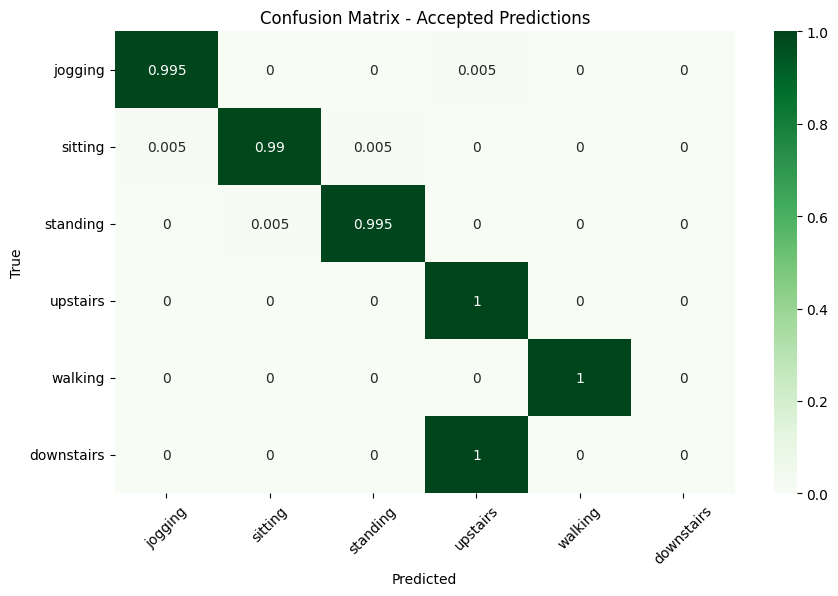

In [113]:
### plt confusion matrix

classes_names = ['jogging', 'sitting', 'standing', 'upstairs', 'walking', 'downstairs']

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xticks(ticks=np.arange(6) + 0.5, labels=classes_names, rotation=45)
plt.yticks(ticks=np.arange(6) + 0.5, labels=classes_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Accepted Predictions")
plt.show()

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━

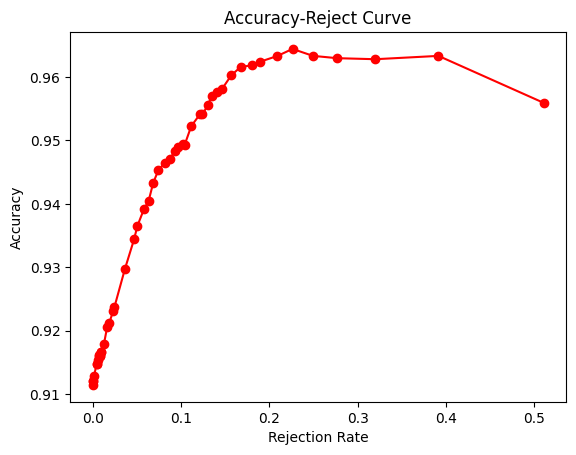

In [115]:
# Optional: Plot Accuracy-Reject Curve (ARC)
import matplotlib.pyplot as plt

def plot_accuracy_reject_curve(model, X_test, y_true):
    thresholds = np.linspace(0, np.max(entropies), 50)  # Range of entropy thresholds
    accuracies = []
    reject_rates = []

    for threshold in thresholds:
        _, accepted, _, _ = predict_with_rejector(model, X_test, threshold)
        if np.any(accepted):  # Ensure there are accepted samples to avoid division by zero
            accuracy = accuracy_score(y_true[accepted], predictions[accepted])
            accuracies.append(accuracy)
            reject_rates.append(1 - np.mean(accepted))  # Rejection rate is the proportion of rejected samples

    plt.plot(reject_rates, accuracies, marker='o', color='r')
    plt.xlabel("Rejection Rate")
    plt.ylabel("Accuracy")
    plt.title("Accuracy-Reject Curve")
    plt.show()

# Plot the ARC
plot_accuracy_reject_curve(model, X_test, y_true)

# test stuff

In [35]:
from src.data_preprocessing import matrix_fourier_adjust
import pandas as pd

df_fft = pd.read_csv("processed_test_data_trial_2.csv")
data_downstairs = df_fft[df_fft["class"] == 5]

X_acc_x_down, X_acc_y_down, X_acc_z_down, X_gyro_x_down, X_gyro_y_down, X_gyro_z_down, class_labels_down = matrix_fourier_adjust(data_downstairs, testing=False)

In [36]:
from sklearn.metrics import confusion_matrix
import numpy as np

predictions = model.predict([X_acc_x_down, X_acc_y_down, X_acc_z_down, X_gyro_x_down, X_gyro_y_down, X_gyro_z_down])

# evaluate model with confusion matrix
y_pred = [int(x) for x in predictions.argmax(axis=1)]
y_true = [int(x) for x in class_labels]

# get predictions for the new class
# y_pred = [5 if x == 0 else x for x in y_pred]
y_pred_downstairs = y_pred
y_pred_downstairs

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/var/folders/xh/n_j2f34x3gbbkjmhhfy63yc00000gn/T/ipykernel_83885/1824454079.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_true = [int(x) for x in class_labels]


[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [70]:
from src.data_preprocessing import matrix_fourier_adjust
import pandas as pd

df_fft = pd.read_csv("processed_test_data_trial_2.csv")
data_no_downstairs = df_fft[df_fft["class"] != 5]

X_acc_x, X_acc_y, X_acc_z, X_gyro_x, X_gyro_y, X_gyro_z, class_labels = matrix_fourier_adjust(data_no_downstairs, testing=False)

In [71]:
X_acc_x = np.concatenate([X_acc_x, X_acc_x_down])
X_acc_y = np.concatenate([X_acc_y, X_acc_y_down])
X_acc_z = np.concatenate([X_acc_z, X_acc_z_down])   
X_gyro_x = np.concatenate([X_gyro_x, X_gyro_x_down])
X_gyro_y = np.concatenate([X_gyro_y, X_gyro_y_down])
X_gyro_z = np.concatenate([X_gyro_z, X_gyro_z_down])

y_pred_downstairs_arr = np.array(y_pred_downstairs).reshape(-1, 1)
class_labels = np.concatenate([class_labels, y_pred_downstairs_arr])
class_labels

array([[0.],
       [0.],
       [0.],
       ...,
       [3.],
       [3.],
       [3.]])

In [72]:
from sklearn.metrics import confusion_matrix
import numpy as np

predictions = model.predict([X_acc_x, X_acc_y, X_acc_z, X_gyro_x, X_gyro_y, X_gyro_z])

# evaluate model with confusion matrix
y_pred = [int(x) for x in predictions.argmax(axis=1)]
y_true = [int(x) for x in class_labels]

cm = confusion_matrix(y_true, y_pred)
print(cm)

# cm to percentage matrix with 4 decimal places
cm = np.round(cm / cm.sum(axis=1)[:, np.newaxis], 3)
print(cm)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[[253   0   0   2   7]
 [  1 251   8   0   0]
 [  0  11 249   0   0]
 [  0   0   0 300   1]
 [ 36   0   0   8 217]]
[[0.966 0.    0.    0.008 0.027]
 [0.004 0.965 0.031 0.    0.   ]
 [0.    0.042 0.958 0.    0.   ]
 [0.    0.    0.    0.997 0.003]
 [0.138 0.    0.    0.031 0.831]]


/var/folders/xh/n_j2f34x3gbbkjmhhfy63yc00000gn/T/ipykernel_83885/294570611.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_true = [int(x) for x in class_labels]


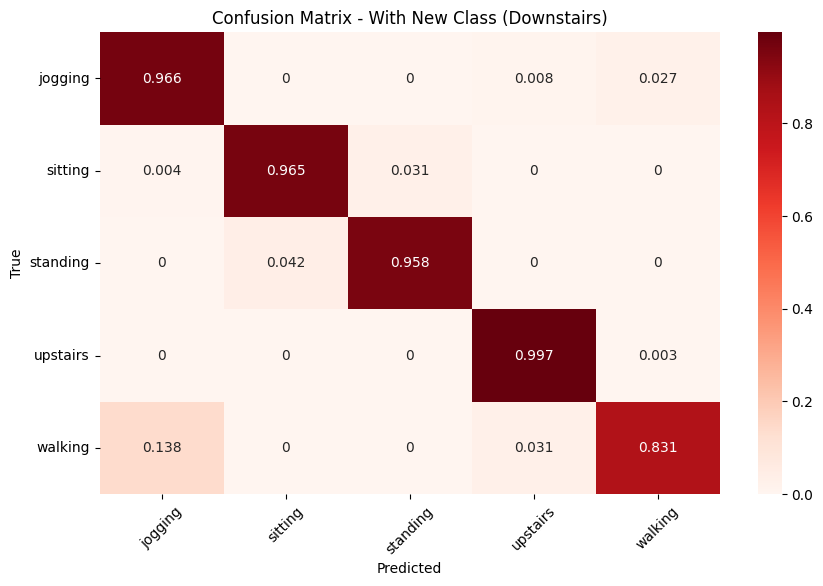

In [75]:
# plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

classes_names = ['jogging', 'sitting', 'standing', 'upstairs', 'walking']

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xticks(ticks=np.arange(5) + 0.5, labels=classes_names, rotation=45)
plt.yticks(ticks=np.arange(5) + 0.5, labels=classes_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - With New Class (Downstairs)")
plt.show()

In [77]:
### classification report

from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=classes_names))

              precision    recall  f1-score   support

     jogging       0.87      0.97      0.92       262
     sitting       0.96      0.97      0.96       260
    standing       0.97      0.96      0.96       260
    upstairs       0.97      1.00      0.98       301
     walking       0.96      0.83      0.89       261

    accuracy                           0.94      1344
   macro avg       0.95      0.94      0.94      1344
weighted avg       0.95      0.94      0.94      1344



42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


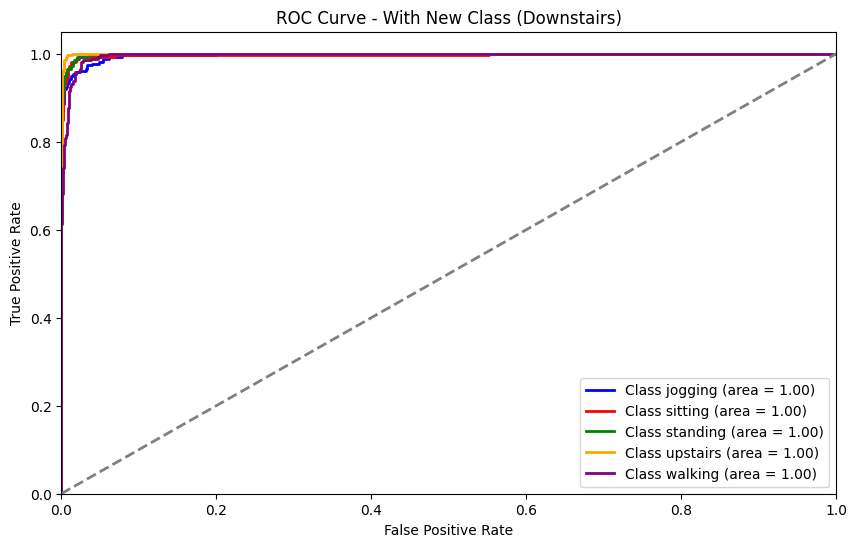

In [78]:
### plot roc curve

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

n_classes = 5
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])
y_pred_proba = model.predict([X_acc_x, X_acc_y, X_acc_z, X_gyro_x, X_gyro_y, X_gyro_z])

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Class {classes_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - With New Class (Downstairs)')
plt.legend(loc="lower right")
plt.show()

## ML with rejection

In [80]:
import numpy as np
from scipy.stats import entropy
from sklearn.metrics import accuracy_score, confusion_matrix

def calculate_entropy(predictions):
    """Calculate entropy for a given set of predictions (softmax probabilities)."""
    return entropy(predictions, axis=1)

def predict_with_rejector(model, X_test, threshold):
    """Make predictions with a rejection mechanism based on entropy."""
    softmax_outputs = model.predict(X_test)
    entropies = calculate_entropy(softmax_outputs)

    predictions = np.argmax(softmax_outputs, axis=1)
    rejected = entropies > threshold
    accepted = ~rejected

    return predictions, accepted, rejected, entropies

# entropy_threshold = 1.5
entropy_thresholds = [1.5, 1.4, 1.3, 1.2, 1.1, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.3, 0.1]
X_test = [X_acc_x, X_acc_y, X_acc_z, X_gyro_x, X_gyro_y, X_gyro_z]

for i in range(len(entropy_thresholds)):
    entropy_threshold = entropy_thresholds[i]
    predictions, accepted, rejected, entropies = predict_with_rejector(model, X_test, entropy_threshold)

    y_true = np.array(class_labels)

    # Only evaluate accuracy on accepted instances
    accuracy_with_rejection = accuracy_score(y_true[accepted], predictions[accepted])

    reject_rate = np.mean(rejected)  # Proportion of rejected samples

    print(f"Entropy threshold: {entropy_threshold}")
    print(f"Accuracy with rejection: {accuracy_with_rejection}")
    print(f"Rejection rate: {reject_rate * 100:.2f}%")

    if entropy_threshold < 0:
        break

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Entropy threshold: 1.5
Accuracy with rejection: 0.9449404761904762
Rejection rate: 0.00%
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Entropy threshold: 1.4
Accuracy with rejection: 0.9449404761904762
Rejection rate: 0.00%
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Entropy threshold: 1.3
Accuracy with rejection: 0.9449404761904762
Rejection rate: 0.00%
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Entropy threshold: 1.2
Accuracy with rejection: 0.9449404761904762
Rejection rate: 0.00%
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Entropy threshold: 1.1
Accuracy with rejection: 0.9449404761904762
Rejection rate: 0.00%
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Entropy threshold: 1.0
Accuracy with rejection: 0.9470149253731344
Rejection rate: 0.30%
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Entropy threshold: 0.9
Accuracy with rejection: 0.9490254872563718
Rejection rate: 0.74%
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Entropy threshold: 0.8
Accuracy with rejection: 0.950301204819277

In [81]:
# Confusion matrix for accepted predictions
conf_matrix = confusion_matrix(y_true[accepted], predictions[accepted])
print("Confusion Matrix for Accepted Predictions:\n", conf_matrix)

Confusion Matrix for Accepted Predictions:
 [[218   0   0   1   0]
 [  1 196   1   0   0]
 [  0   1 185   0   0]
 [  0   0   0 256   0]
 [  0   0   0   0 129]]


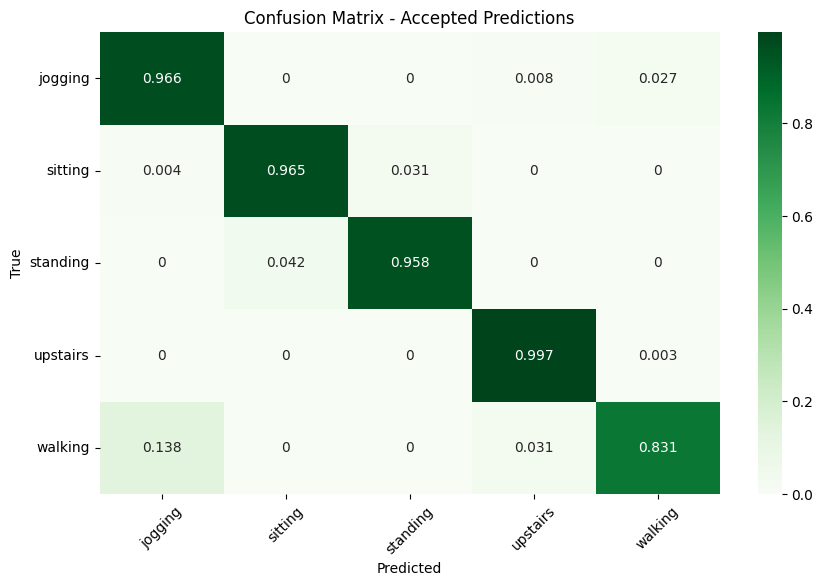

In [83]:
### plt confusion matrix

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xticks(ticks=np.arange(5) + 0.5, labels=classes_names, rotation=45)
plt.yticks(ticks=np.arange(5) + 0.5, labels=classes_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Accepted Predictions")
plt.show()

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
42/42 ━━━━━━━━━━━━━━━━━━━

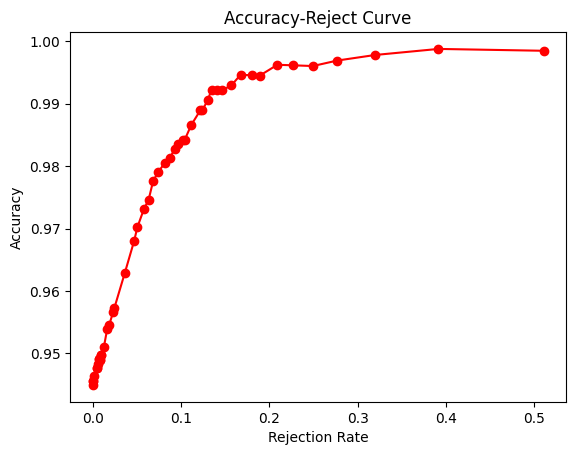

In [85]:
# Optional: Plot Accuracy-Reject Curve (ARC)
import matplotlib.pyplot as plt

def plot_accuracy_reject_curve(model, X_test, y_true):
    thresholds = np.linspace(0, np.max(entropies), 50)  # Range of entropy thresholds
    accuracies = []
    reject_rates = []

    for threshold in thresholds:
        _, accepted, _, _ = predict_with_rejector(model, X_test, threshold)
        if np.any(accepted):  # Ensure there are accepted samples to avoid division by zero
            accuracy = accuracy_score(y_true[accepted], predictions[accepted])
            accuracies.append(accuracy)
            reject_rates.append(1 - np.mean(accepted))  # Rejection rate is the proportion of rejected samples

    plt.plot(reject_rates, accuracies, marker='o', color='r')
    plt.xlabel("Rejection Rate")
    plt.ylabel("Accuracy")
    plt.title("Accuracy-Reject Curve")
    plt.show()

# Plot the ARC
plot_accuracy_reject_curve(model, X_test, y_true)